## The Code
First, we'll want to import the keras modules we'll be using for our neural network and the numpy and matplotlib modules that we'll be using for displaying our test images.

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
import numpy
from matplotlib.pyplot import imshow
# tell matplotlib to display images within this notebook
%matplotlib inline

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## The First Model
Next, let's set up the structure of our model. We'll start with a really simple model, with just one convolutional layer that has just one filter. We are going to be using 9x9-pixel grayscale images, so we set the input shape accordingly. If we were using color images with red-green-blue channels, the last dimension would be size three (one for each color) instead of one.

In [2]:
kernel_size = 3
image_size = 9

In [3]:
model0 = Sequential()
model0.add(Conv2D(filters=1, kernel_size=kernel_size, input_shape=(image_size, image_size, 1)))

Normally at this point, we would compile and train (aka fit) our model, but instead we're going to set the weights manually and then see the output we get on some test images.

First, let's take a look at what the randomly generated weights look like, to understand the format that we'll need to use to set the new weights. By changing the parameters of the model above and looking at how it affects the weight structure, we can understand what each weight is connected to (try it!).

In [4]:
weights = model0.get_weights()
weights

[array([[[[ 0.05504304]],
 
         [[-0.52937335]],
 
         [[ 0.06574064]]],
 
 
        [[[ 0.53953004]],
 
         [[-0.08595619]],
 
         [[ 0.14185762]]],
 
 
        [[[-0.05460644]],
 
         [[ 0.21020067]],
 
         [[-0.10927469]]]], dtype=float32), array([ 0.], dtype=float32)]

Now, we change the weights so that the filter will capture a certain pattern. We'll explore more about what this means below, but feel free to start generating some guesses.

In [5]:
layer_num = 0
filter_num = 0
y = 0
for x in range(kernel_size):
    weights[layer_num][y][x][0][filter_num] = 1
for y in range(1,kernel_size):
    for x in range(kernel_size):
        weights[layer_num][y][x][0][filter_num] = -1
weights

[array([[[[ 1.]],
 
         [[ 1.]],
 
         [[ 1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]]], dtype=float32), array([ 0.], dtype=float32)]


And save those weights back into the model.

In [6]:
model0.set_weights(weights)

## Create Images
Now, let's create some 9x9 images that we will run through our model.

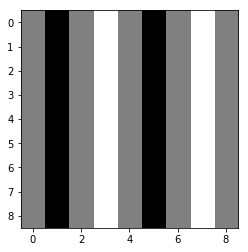

In [7]:
image0 = numpy.array([
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
], dtype=numpy.uint8)
imshow(image0, cmap='gray')

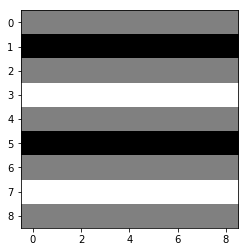

In [8]:
image1 = numpy.array([
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
], dtype=numpy.uint8)
imshow(image1, cmap='gray')


## Run Images Through Model
The images need to be in a slightly different format for Keras than they do for the imshow command. Right now, they are 9x9 arrays, and we need them to be 9x9x1 -- three dimensional instead of two.

In [9]:
images = []
for image in [image0]: # You may find it easier to take one of these out, to look at them one at a time
    images.append(numpy.resize(image, (image_size, image_size, 1)))

And now we give these images to our model and take a look at what the filter has found. Step = 1

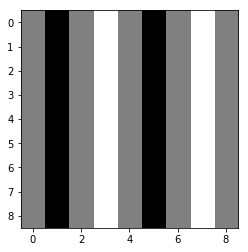

In [10]:
imshow(image0, cmap='gray')

In [11]:
model0.predict(numpy.array(images))

array([[[[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]]]], dtype=float32)

In [12]:
images = []
for image in [image1]: # You may find it easier to take one of these out, to look at them one at a time
    images.append(numpy.resize(image, (image_size, image_size, 1)))

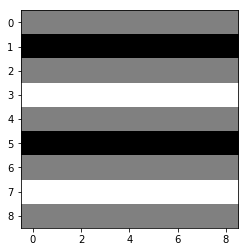

In [13]:
imshow(image1, cmap='gray')

In [14]:
model0.predict(numpy.array(images))

array([[[[    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.]],

        [[-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.]],

        [[ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.]],

        [[  381.],
         [  381.],
         [  381.],
         [  381.],
         [  381.],
         [  381.],
         [  381.]],

        [[    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.],
         [    0.]],

        [[-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.],
         [-1149.]],

        [[ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.],
         [ -765.]]]], dtype=float32)

### Question 1
There are a lot of numbers that are being predicted. What does it mean if a particular number is greater than zero?

   #### Answer:
It means that the top row of the 3x3 filter has a larger value (is lighter) than the bottom two rows. This is because the values of the top row are multiplied by positive 1, and the values of the bottom two rows are multiplied by negative 1. The +1 and -1 are determined by the weights we set. For example, in Model 1, the filters of the fourth row gives positive outputs of 381, because its top row has the values 255, and the bottom two rows have the values 128 and 0. Therefore 3x255 – 3x128 – 3x0 = 381.

### Question 2
In which image is the filter "finding" something, and why does this make sense, given the pattern of weights that was set?

#### Answer:
The image is "finding" something when it outputs a positive value. For example, in Model 0, nothing was "found" because the lines are vertical and the pattern of the weights is horizontal, therefore it's be impossible to find a 3x3 that would have the top row be light, and the bottom two rows darker.

## The Second Model

Let's move to a slightly more complex model. Now, there are two convolutional layers, the first with two filters and the second with one filter. One other difference is that we're going to be taking strides so that we only examine each pixel once, instead of looking at overlapping groups. This makes it a little simpler to set the manual weights correctly for the pattern I chose.

In [15]:
model1 = Sequential()
model1.add(Conv2D(filters=2, kernel_size=kernel_size, input_shape=(image_size, image_size, 1), strides=(3,3)))
model1.add(Conv2D(filters=1, kernel_size=kernel_size, input_shape=(image_size, image_size, 1)))

With a different model structure, we will have a different number of weights to fit.

In [16]:
weights = model1.get_weights()
weights

[array([[[[ 0.35713938, -0.31241292]],
 
         [[-0.18223163, -0.33809122]],
 
         [[ 0.25095919, -0.20133504]]],
 
 
        [[[ 0.11246362,  0.02829537]],
 
         [[ 0.22107407,  0.01358959]],
 
         [[ 0.38670531, -0.32016197]]],
 
 
        [[[ 0.40767154, -0.29870504]],
 
         [[-0.12218192,  0.42275539]],
 
         [[ 0.11667946, -0.39745939]]]], dtype=float32),
 array([ 0.,  0.], dtype=float32),
 array([[[[ 0.3144345 ],
          [ 0.18069109]],
 
         [[-0.36447001],
          [-0.10973141]],
 
         [[ 0.00350222],
          [-0.32081932]]],
 
 
        [[[-0.05010259],
          [ 0.19303808]],
 
         [[ 0.03993973],
          [-0.44308522]],
 
         [[ 0.31778601],
          [-0.31559461]]],
 
 
        [[[-0.27441669],
          [ 0.29421434]],
 
         [[ 0.16977528],
          [-0.20894161]],
 
         [[-0.244271  ],
          [ 0.25902542]]]], dtype=float32),
 array([ 0.], dtype=float32)]


As before, we manually set the weights to match some specific patterns.

In [17]:
layer_num = 0
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        if y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1

filter_num = 1
for y in range(kernel_size):
    for x in range(kernel_size):
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1
weights

[array([[[[ 1., -1.]],
 
         [[-1., -1.]],
 
         [[-1.,  1.]]],
 
 
        [[[-1., -1.]],
 
         [[ 1.,  1.]],
 
         [[-1., -1.]]],
 
 
        [[[-1.,  1.]],
 
         [[-1., -1.]],
 
         [[ 1., -1.]]]], dtype=float32),
 array([ 0.,  0.], dtype=float32),
 array([[[[ 0.3144345 ],
          [ 0.18069109]],
 
         [[-0.36447001],
          [-0.10973141]],
 
         [[ 0.00350222],
          [-0.32081932]]],
 
 
        [[[-0.05010259],
          [ 0.19303808]],
 
         [[ 0.03993973],
          [-0.44308522]],
 
         [[ 0.31778601],
          [-0.31559461]]],
 
 
        [[[-0.27441669],
          [ 0.29421434]],
 
         [[ 0.16977528],
          [-0.20894161]],
 
         [[-0.244271  ],
          [ 0.25902542]]]], dtype=float32),
 array([ 0.], dtype=float32)]

In [18]:
layer_num = 2
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        input_filter_num = 0
        if y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
        input_filter_num = 1
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
weights    

[array([[[[ 1., -1.]],
 
         [[-1., -1.]],
 
         [[-1.,  1.]]],
 
 
        [[[-1., -1.]],
 
         [[ 1.,  1.]],
 
         [[-1., -1.]]],
 
 
        [[[-1.,  1.]],
 
         [[-1., -1.]],
 
         [[ 1., -1.]]]], dtype=float32),
 array([ 0.,  0.], dtype=float32),
 array([[[[ 1.  ],
          [-0.25]],
 
         [[-0.25],
          [-0.25]],
 
         [[-0.25],
          [ 1.  ]]],
 
 
        [[[-0.25],
          [-0.25]],
 
         [[ 1.  ],
          [ 1.  ]],
 
         [[-0.25],
          [-0.25]]],
 
 
        [[[-0.25],
          [ 1.  ]],
 
         [[-0.25],
          [-0.25]],
 
         [[ 1.  ],
          [-0.25]]]], dtype=float32),
 array([ 0.], dtype=float32)]


And save the weights back into the model.

In [19]:
model1.set_weights(weights)


Again, run our test images through the model to see what the filters output.

In [15]:
def predict_images(images):
    resized_images = []
    for image in images:
        resized_images.append(numpy.resize(image, (image_size, image_size, 1)))
    return model2.predict(numpy.array(resized_images))

In [22]:
predict_images([image0, image1])

NameError: name 'model2' is not defined

### Exercise 1
Note above that neither image0 nor image1 gets a positive output. Create some images that do get positive ouputs from this model. The code below might help you get started.

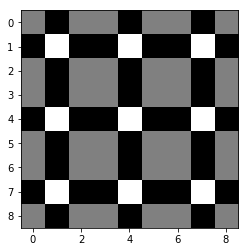

In [23]:
image_black = numpy.array([
    [128, 0, 128, 128, 0, 128, 128, 0, 128],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [128, 0, 128, 128, 0, 128, 128, 0, 128],
    [128, 0, 128, 128, 0, 128, 128, 0, 128],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [128, 0, 128, 128, 0, 128, 128, 0, 128],
    [128, 0, 128, 128, 0, 128, 128, 0, 128],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [128, 0, 128, 128, 0, 128, 128, 0, 128],
], dtype=numpy.uint8)
imshow(image_black, cmap='gray', vmin=0, vmax=255)

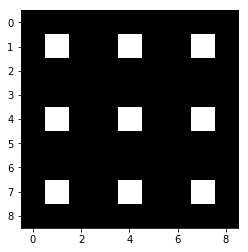

In [24]:
image_new = numpy.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=numpy.uint8)
imshow(image_new, cmap='gray', vmin=0, vmax=255)

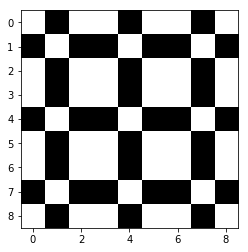

In [25]:
image_white = numpy.array([
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
], dtype=numpy.uint8)
imshow(image_white, cmap='gray', vmin=0, vmax=255)

In [26]:
predict_images([image_black, image_new, image_white])

NameError: name 'model2' is not defined

### Exercise 2 (Optional)

Add additional filters to the model, and create images that get positive weights for different patterns of filters.

In [4]:
model2 = Sequential()
model2.add(Conv2D(filters=2, kernel_size=kernel_size, input_shape=(image_size, image_size, 1), strides=(3,3)))
model2.add(Conv2D(filters=1, kernel_size=kernel_size, input_shape=(image_size, image_size, 1)))

In [8]:
weights = model2.get_weights()
weights

[array([[[[-0.46229598, -0.35528097]],
 
         [[ 0.44115254,  0.45371982]],
 
         [[ 0.1678175 , -0.43486556]]],
 
 
        [[[-0.11620492, -0.20081109]],
 
         [[-0.30063751,  0.45400891]],
 
         [[-0.31613147, -0.27943182]]],
 
 
        [[[ 0.34297779, -0.36911535]],
 
         [[ 0.31914482, -0.4208653 ]],
 
         [[-0.09552252, -0.03945854]]]], dtype=float32),
 array([ 0.,  0.], dtype=float32),
 array([[[[ 0.42563269],
          [-0.41181833]],
 
         [[ 0.08187214],
          [-0.06712914]],
 
         [[ 0.17606118],
          [ 0.0651516 ]]],
 
 
        [[[ 0.32938495],
          [-0.06322375]],
 
         [[-0.0793896 ],
          [-0.0816454 ]],
 
         [[ 0.39281312],
          [-0.25588453]]],
 
 
        [[[ 0.35266069],
          [-0.10486621]],
 
         [[-0.04070666],
          [-0.13709009]],
 
         [[-0.32974267],
          [ 0.05732939]]]], dtype=float32),
 array([ 0.], dtype=float32)]

In [9]:
layer_num = 0
filter_num = 0

weights[layer_num][0][0][0][filter_num] = 1
weights[layer_num][0][1][0][filter_num] = -1
weights[layer_num][0][2][0][filter_num] = 1
weights[layer_num][1][0][0][filter_num] = 1
weights[layer_num][1][1][0][filter_num] = 1
weights[layer_num][1][2][0][filter_num] = -1
weights[layer_num][2][0][0][filter_num] = 1
weights[layer_num][2][1][0][filter_num] = -1
weights[layer_num][2][2][0][filter_num] = 1

filter_num = 1

weights[layer_num][0][0][0][filter_num] = -1
weights[layer_num][0][1][0][filter_num] = -1
weights[layer_num][0][2][0][filter_num] = 1
weights[layer_num][1][0][0][filter_num] = -1
weights[layer_num][1][1][0][filter_num] = -1
weights[layer_num][1][2][0][filter_num] = -1
weights[layer_num][2][0][0][filter_num] = 1
weights[layer_num][2][1][0][filter_num] = -1
weights[layer_num][2][2][0][filter_num] = 1

weights

[array([[[[ 1., -1.]],
 
         [[-1., -1.]],
 
         [[ 1.,  1.]]],
 
 
        [[[ 1., -1.]],
 
         [[ 1., -1.]],
 
         [[-1., -1.]]],
 
 
        [[[ 1.,  1.]],
 
         [[-1., -1.]],
 
         [[ 1.,  1.]]]], dtype=float32),
 array([ 0.,  0.], dtype=float32),
 array([[[[ 0.42563269],
          [-0.41181833]],
 
         [[ 0.08187214],
          [-0.06712914]],
 
         [[ 0.17606118],
          [ 0.0651516 ]]],
 
 
        [[[ 0.32938495],
          [-0.06322375]],
 
         [[-0.0793896 ],
          [-0.0816454 ]],
 
         [[ 0.39281312],
          [-0.25588453]]],
 
 
        [[[ 0.35266069],
          [-0.10486621]],
 
         [[-0.04070666],
          [-0.13709009]],
 
         [[-0.32974267],
          [ 0.05732939]]]], dtype=float32),
 array([ 0.], dtype=float32)]

In [10]:
layer_num = 2
filter_num = 0

weights[layer_num][0][0][0][filter_num] = -0.25
weights[layer_num][0][1][0][filter_num] = -0.25
weights[layer_num][0][2][0][filter_num] = 1
weights[layer_num][1][0][0][filter_num] = -0.25
weights[layer_num][1][1][0][filter_num] = -0.25
weights[layer_num][1][2][0][filter_num] = -0.25
weights[layer_num][2][0][0][filter_num] = 1
weights[layer_num][2][1][0][filter_num] = -0.25
weights[layer_num][2][2][0][filter_num] = 1

weights[layer_num][0][0][1][filter_num] = -0.25
weights[layer_num][0][1][1][filter_num] = -0.25
weights[layer_num][0][2][1][filter_num] = 1
weights[layer_num][1][0][1][filter_num] = -0.25
weights[layer_num][1][1][1][filter_num] = -0.25
weights[layer_num][1][2][1][filter_num] = -0.25
weights[layer_num][2][0][1][filter_num] = 1
weights[layer_num][2][1][1][filter_num] = -0.25
weights[layer_num][2][2][1][filter_num] = 1

weights  
model2.set_weights(weights)

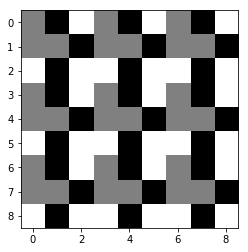

In [11]:
image_1 = numpy.array([
    [128, 0, 255, 128, 0, 255, 128, 0, 255],
    [128, 128, 0, 128, 128, 0, 128, 128, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [128, 0, 255, 128, 0, 255, 128, 0, 255],
    [128, 128, 0, 128, 128, 0, 128, 128, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [128, 0, 255, 128, 0, 255, 128, 0, 255],
    [128, 128, 0, 128, 128, 0, 128, 128, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
], dtype=numpy.uint8)
imshow(image_1, cmap='gray', vmin=0, vmax=255)

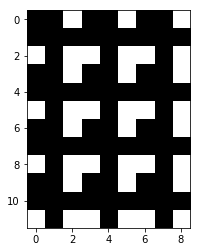

In [12]:
image_2 = numpy.array([
    [0, 0, 255, 0, 0, 255, 0, 0, 255],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [0, 0, 255, 0, 0, 255, 0, 0, 255],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [0, 0, 255, 0, 0, 255, 0, 0, 255],    
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [0, 0, 255, 0, 0, 255, 0, 0, 255], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
], dtype=numpy.uint8)
imshow(image_2, cmap='gray', vmin=0, vmax=255)

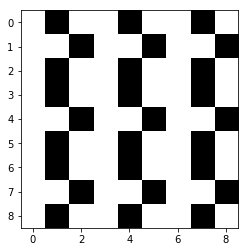

In [13]:
image_3 = numpy.array([
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 255, 0, 255, 255, 0, 255, 255, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 255, 0, 255, 255, 0, 255, 255, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 255, 0, 255, 255, 0, 255, 255, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
], dtype=numpy.uint8)
imshow(image_3, cmap='gray', vmin=0, vmax=255)

In [17]:
predict_images([image_1, image_2, image_3])

array([[[[ 2295.]]],


       [[[ 2295.]]],


       [[[ 2295.]]]], dtype=float32)